In [35]:
%matplotlib inline
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

NEW_LINE = '\n'
CARRIAGE_RETURN = '\r'
DELIMITER = ','
SMOKER = 1
NON_SMOKER = 0
UNKNOWN_NUMBER = np.nan

column_names = ['id','ccf','age','gender','painloc','painexer','relrest','pncaden','cp','trestbps','htn','chol','smoke','cigs','years','fbs','dm','famhist','restecg','ekgmo','ekgday','ekgyr','dig','prop','nitr','pro','diuretic','proto','thaldur','thaltime','met','thalach','thalrest','tpeakbps','tpeakbpd','dummy','trestbpd','exang','xhypo','oldpeak','slope','rldv5','rldv5e','ca','restckm','exerckm','restef','restwm','exeref','exerwm','thal','thalsev','thalpul','earlobe','cmo','cday','cyr','num','lmt','ladprox','laddist','diag','cxmain','ramus','om1','om2','rcaprox','rcadist','lvx1','lvx2','lvx3','lvx4','lvf','cathef','junk','name']

data_records = []

In [36]:
def is_nan(x):
    
    return isinstance(x, float) and math.isnan(x)

In [37]:
def update_smoker_details(row):
    
    smoker_status = row['IS_SMOKER']    
    cigs_per_day = row['NUM_CIGS_PER_DAY']    
    years_smoking = row['SMOKING_YEARS']    
    
    reply = {'smoker_status':smoker_status, 'cigs_per_day':cigs_per_day, 'years_smoking':years_smoking}
        
    if ((is_nan(smoker_status) or (smoker_status == 0)) and (cigs_per_day > 0) and (years_smoking > 0)):
        reply['smoker_status'] = SMOKER
    
    if ((is_nan(smoker_status)) and (cigs_per_day == 0) and (years_smoking == 0)):
        reply['smoker_status'] = NON_SMOKER
        
    if ((smoker_status == 0) and (is_nan(cigs_per_day)) and (is_nan(years_smoking))):
        reply['cigs_per_day'] = 0
        reply['years_smoking'] = 0
        
    return reply

In [38]:
def reduce_results(result):
    
    ret = -1
    
    if result == 0:
        ret = 0
    else:
        ret = 1
        
    return ret
        

In [39]:
def is_last_line(line):
    
    return line.find('name') > -1

In [40]:
def process_bad_line(line):
    with open("Raw Data/Output.txt", "w") as text_file:
        print(line, file=text_file)

In [41]:
def assemble_records(fileName):
    
    s = ''
    
    slash_location = fileName.find('\\')                
    period_location = fileName.find('.')
            
    with open(fileName, 'r') as f_in:
        
        for line in f_in:
                        
            if (line.find('"') > -1) or (line.find("'") > -1):
                process_bad_line(line)
                continue
            
            if line.find(' ') > -1:
                line = line.replace(' ', DELIMITER)
            
            if line.find(CARRIAGE_RETURN) > -1:
                line = line.replace(CARRIAGE_RETURN, DELIMITER)

            if line.find(NEW_LINE) > -1:
                line = line.replace(NEW_LINE, DELIMITER)
    
            if is_last_line(line):                
                parsed_file_name = fileName[slash_location + 1 : period_location]

                line = line.replace('name' + DELIMITER, parsed_file_name + NEW_LINE)

                s = s + line

                data_records.append(s)
                
                s = ''
            else:
                s = s + line
                

In [42]:
"""Import data into a dataframe"""

file_glob = glob.glob('Raw Data/*.data')

for f in file_glob:
    assemble_records(f)

df = pd.DataFrame([s.split(',') for s in data_records], columns = column_names)

In [43]:
"""Display what we've got"""

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 76 columns):
id          899 non-null object
ccf         899 non-null object
age         899 non-null object
gender      899 non-null object
painloc     899 non-null object
painexer    899 non-null object
relrest     899 non-null object
pncaden     899 non-null object
cp          899 non-null object
trestbps    899 non-null object
htn         899 non-null object
chol        899 non-null object
smoke       899 non-null object
cigs        899 non-null object
years       899 non-null object
fbs         899 non-null object
dm          899 non-null object
famhist     899 non-null object
restecg     899 non-null object
ekgmo       899 non-null object
ekgday      899 non-null object
ekgyr       899 non-null object
dig         899 non-null object
prop        899 non-null object
nitr        899 non-null object
pro         899 non-null object
diuretic    899 non-null object
proto       899 non-null object

In [44]:
"""Rename columns / drop unnecessary columns"""

#df.rename(columns={'dm':'HISTORY_OF_DIABETES','smoke':'IS_SMOKER','cigs':'NUM_CIGS_PER_DAY','years':'SMOKING_YEARS','famhist':'HISTORY_OF_HRT_DISEASE','thalrest':'RESTING_HEART_RATE','trestbps':'RESTING_BP_SYS','trestbpd':'RESTING_BP_DIAG','thalach':'PEAK_HEART_RATE','tpeakbps':'PEAK_BP_SYS','tpeakbpd':'PEAK_BP_DIAG','num':'RESULT'}, inplace=True)
df.rename(columns={'smoke':'IS_SMOKER','cigs':'NUM_CIGS_PER_DAY','years':'SMOKING_YEARS','famhist':'HISTORY_OF_HRT_DISEASE','thalrest':'RESTING_HEART_RATE','trestbps':'RESTING_BP_SYS','trestbpd':'RESTING_BP_DIAG','thalach':'PEAK_HEART_RATE','tpeakbps':'PEAK_BP_SYS','tpeakbpd':'PEAK_BP_DIAG','num':'RESULT'}, inplace=True)
df.drop(['id','ccf','dm','age','gender','painloc','painexer','relrest','pncaden','cp','htn','chol','fbs','restecg','ekgmo','ekgday','ekgyr','dig','prop','nitr','pro','diuretic','proto','thaldur','thaltime','met','dummy','exang','xhypo','oldpeak','slope','rldv5','rldv5e','ca','restckm','exerckm','restef','restwm','exeref','exerwm','thal','thalsev','thalpul','earlobe','cmo','cday','cyr','lmt','ladprox','laddist','diag','cxmain','ramus','om1','om2','rcaprox','rcadist','lvx1','lvx2','lvx3','lvx4','lvf','cathef','junk','name'], inplace=True, axis=1)

In [45]:
"""Cast columns"""

df['IS_SMOKER'] = df['IS_SMOKER'].astype(int)
df['NUM_CIGS_PER_DAY'] = df['NUM_CIGS_PER_DAY'].astype(int)
df['SMOKING_YEARS'] = df['SMOKING_YEARS'].astype(int)
df['HISTORY_OF_HRT_DISEASE'] = df['HISTORY_OF_HRT_DISEASE'].astype(int)
df['RESTING_HEART_RATE'] = df['RESTING_HEART_RATE'].astype(float)
df['RESTING_BP_SYS'] = df['RESTING_BP_SYS'].astype(float)
df['RESTING_BP_DIAG'] = df['RESTING_BP_DIAG'].astype(float)
df['PEAK_HEART_RATE'] = df['PEAK_HEART_RATE'].astype(float)
df['PEAK_BP_SYS'] = df['PEAK_BP_SYS'].astype(float)
df['PEAK_BP_DIAG'] = df['PEAK_BP_DIAG'].astype(float)
df['RESULT'] = df['RESULT'].astype(int)


In [46]:
"""REduce values 0 through 4 to 0s and 1s."""

df['REDUCED_RESULT'] = df['RESULT'].apply(reduce_results).astype(int)

In [47]:
"""Replace missing values (designated with -9.0s) with NaNs"""

#df = df[['HISTORY_OF_DIABETES','IS_SMOKER','NUM_CIGS_PER_DAY','SMOKING_YEARS','HISTORY_OF_HRT_DISEASE','RESTING_HEART_RATE','RESTING_BP_SYS','RESTING_BP_DIAG','PEAK_HEART_RATE','PEAK_BP_SYS','PEAK_BP_DIAG','RESULT']].replace(to_replace=-9.0, value=UNKNOWN_NUMBER)
df = df[['IS_SMOKER','NUM_CIGS_PER_DAY','SMOKING_YEARS','HISTORY_OF_HRT_DISEASE','RESTING_HEART_RATE','RESTING_BP_SYS','RESTING_BP_DIAG','PEAK_HEART_RATE','PEAK_BP_SYS','PEAK_BP_DIAG','RESULT','REDUCED_RESULT']].replace(to_replace=-9.0, value=UNKNOWN_NUMBER)

In [48]:
"""Display what we've got"""

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 12 columns):
IS_SMOKER                 230 non-null float64
NUM_CIGS_PER_DAY          479 non-null float64
SMOKING_YEARS             467 non-null float64
HISTORY_OF_HRT_DISEASE    477 non-null float64
RESTING_HEART_RATE        843 non-null float64
RESTING_BP_SYS            840 non-null float64
RESTING_BP_DIAG           840 non-null float64
PEAK_HEART_RATE           844 non-null float64
PEAK_BP_SYS               836 non-null float64
PEAK_BP_DIAG              836 non-null float64
RESULT                    899 non-null int32
REDUCED_RESULT            899 non-null int32
dtypes: float64(10), int32(2)
memory usage: 77.3 KB
None


In [49]:
"""Filter out outliers"""

df= df[df['NUM_CIGS_PER_DAY'] < 60]

In [50]:
"""Remove inappropriate values"""

df = df.drop(df[df['HISTORY_OF_HRT_DISEASE'].isnull()].index)
df = df.drop(df[df['NUM_CIGS_PER_DAY'].isnull() & df['SMOKING_YEARS'].isnull()].index)
df = df.drop(df[(df['NUM_CIGS_PER_DAY'] > 0) & (df['SMOKING_YEARS'].isnull())].index)
df = df.drop(df[df['NUM_CIGS_PER_DAY'].isnull() & (df['SMOKING_YEARS'] > 0)].index)
df = df.drop(df[df['IS_SMOKER'].isnull() & df['NUM_CIGS_PER_DAY'].isnull() & df['SMOKING_YEARS'].isnull()].index)
df = df.drop(df[df['RESTING_HEART_RATE'].isnull() | df['RESTING_BP_SYS'].isnull() | df['RESTING_BP_DIAG'].isnull() | df['PEAK_HEART_RATE'].isnull() | df['PEAK_BP_SYS'].isnull() | df['PEAK_BP_DIAG'].isnull()].index)
df = df.drop(df[(df['RESTING_HEART_RATE'] == 0) | (df['RESTING_BP_SYS'] == 0) | (df['RESTING_BP_DIAG'] == 0) | (df['PEAK_HEART_RATE'] == 0) | (df['PEAK_BP_SYS'] == 0) | (df['PEAK_BP_DIAG'] == 0)].index)

In [51]:
"""
Update values to make sense (an active smoker who smokes 0 cigs per day 
or someone which has smoked for 10 yrs who is not listed as s smoker). 
"""

df['IS_SMOKER'] = df.apply(lambda row: update_smoker_details(row)['smoker_status'], axis=1)
df['NUM_CIGS_PER_DAY'] = df.apply(lambda row: update_smoker_details(row)['cigs_per_day'], axis=1)
df['SMOKING_YEARS'] = df.apply(lambda row: update_smoker_details(row)['years_smoking'], axis=1)

In [52]:
"""Display what we've got"""

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 775
Data columns (total 12 columns):
IS_SMOKER                 381 non-null float64
NUM_CIGS_PER_DAY          381 non-null float64
SMOKING_YEARS             381 non-null float64
HISTORY_OF_HRT_DISEASE    381 non-null float64
RESTING_HEART_RATE        381 non-null float64
RESTING_BP_SYS            381 non-null float64
RESTING_BP_DIAG           381 non-null float64
PEAK_HEART_RATE           381 non-null float64
PEAK_BP_SYS               381 non-null float64
PEAK_BP_DIAG              381 non-null float64
RESULT                    381 non-null int32
REDUCED_RESULT            381 non-null int32
dtypes: float64(10), int32(2)
memory usage: 35.7 KB
None


In [53]:
"""Determine the positive class"""
print(len(df[df['REDUCED_RESULT'] == 1])/len(df))

0.5380577427821522


In [54]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [55]:
def difference_in_means(data_set_1, data_set_2):

    return np.mean(data_set_1) - np.mean(data_set_2)

In [56]:
def difference_in_stds(data_set_1, data_set_2):
    var_1 = np.var(data_set_1)
    var_2 = np.var(data_set_2)
    
    n_1 = len(data_set_1)
    n_2 = len(data_set_2)
    
    return np.sqrt(var_1/n_1 + var_2/n_2)

In [57]:
def get_permutation_sets(data_set_1, data_set_2):
    
    combined_data = np.concatenate((data_set_1, data_set_2))
        
    permuted_data = np.random.permutation(combined_data)
    
    return_set_1 = permuted_data[:len(data_set_1)]
    return_set_2 = permuted_data[len(data_set_1):]
        
    return return_set_1, return_set_2 

In [58]:
def draw_permutation_reps(data_set_1, data_set_2, func, size = 1):
    
    permutated_data_reps = np.empty(size)
    
    for i in range(size):        
        perm_set_1, perm_set_2 = get_permutation_sets(data_set_1, data_set_2)        
        permutated_data_reps[i] = func(perm_set_1, perm_set_2)
    
    return permutated_data_reps

In [59]:
def calculate_and_print_permutation_stats(data_set_1,data_set_2):
           
    obs_diff_in_means = difference_in_means(data_set_1,data_set_2)
        
    obs_diff_in_stds = difference_in_stds(data_set_1,data_set_2)

    margin_of_error = 1.96 * obs_diff_in_stds

    conf_int_min = obs_diff_in_means - margin_of_error
    conf_int_max = obs_diff_in_means + margin_of_error

    perm_reps = draw_permutation_reps(data_set_1,data_set_2,difference_in_means,10000)

    p_value = np.sum(perm_reps >= obs_diff_in_means)/len(perm_reps)

    print('Observed difference in means: {0:.2f}'.format(obs_diff_in_means))
    print('Observed difference in std: {0:.2f}'.format(obs_diff_in_stds))
    print('Observed margin of error: {0:.2f}'.format(margin_of_error))
    print('Observed confidence interval is: [{0:.2f}, {1:.2f}]'.format(conf_int_min,conf_int_max))
    print('p value: {0:.3f}'.format(p_value))
    print('')

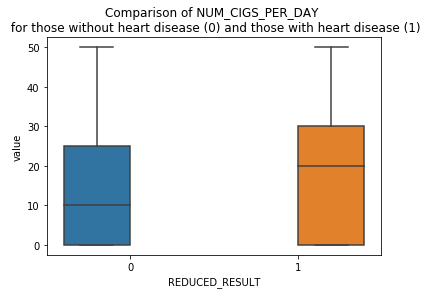

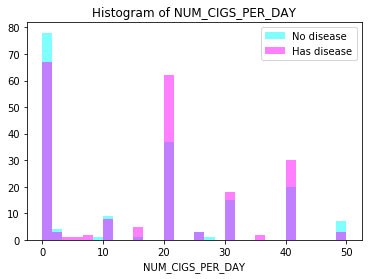

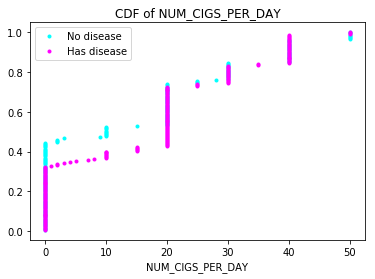

Observed difference in means: -2.31
Observed difference in std: 1.58
Observed margin of error: 3.09
Observed confidence interval is: [-5.40, 0.78]
p value: 0.931



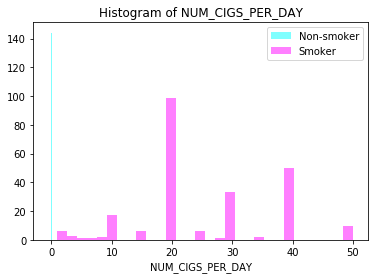

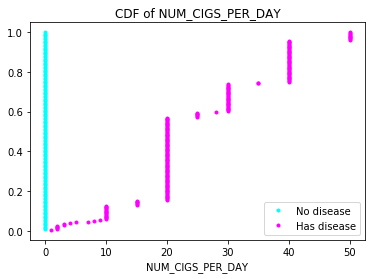

Observed difference in means: -25.43
Observed difference in std: 0.75
Observed margin of error: 1.46
Observed confidence interval is: [-26.90, -23.97]
p value: 1.000



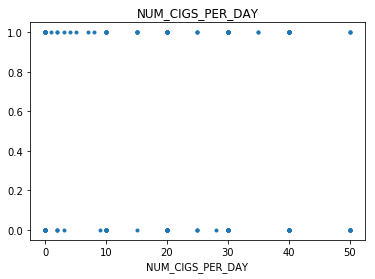

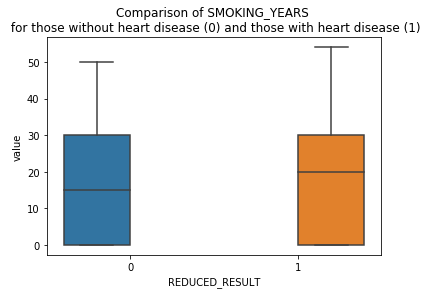

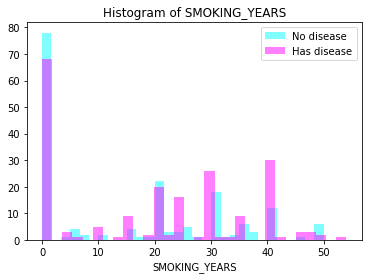

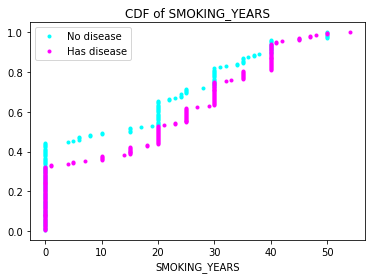

Observed difference in means: -4.12
Observed difference in std: 1.65
Observed margin of error: 3.23
Observed confidence interval is: [-7.35, -0.89]
p value: 0.993



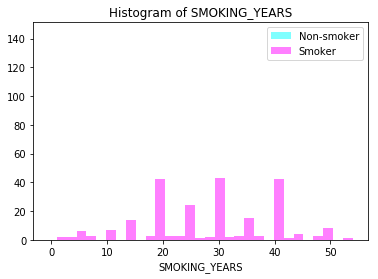

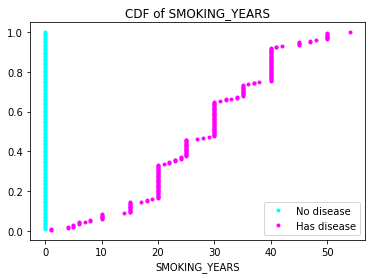

Observed difference in means: -28.04
Observed difference in std: 0.72
Observed margin of error: 1.42
Observed confidence interval is: [-29.46, -26.62]
p value: 1.000



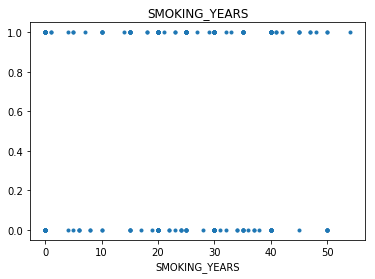

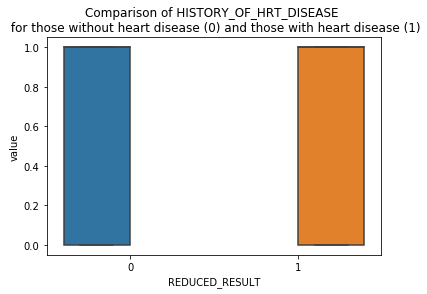

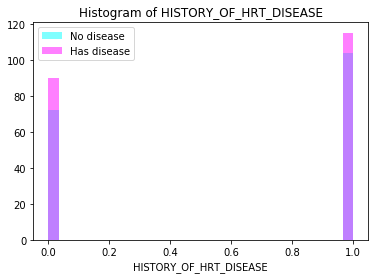

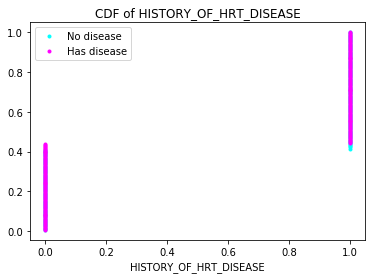

Observed difference in means: 0.03
Observed difference in std: 0.05
Observed margin of error: 0.10
Observed confidence interval is: [-0.07, 0.13]
p value: 0.313



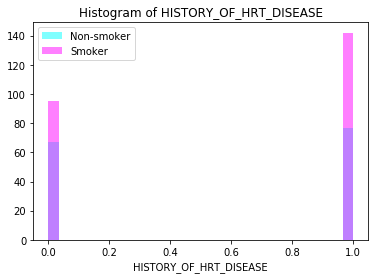

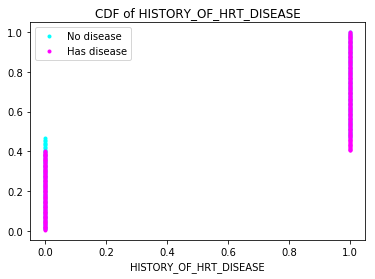

Observed difference in means: -0.06
Observed difference in std: 0.05
Observed margin of error: 0.10
Observed confidence interval is: [-0.17, 0.04]
p value: 0.910



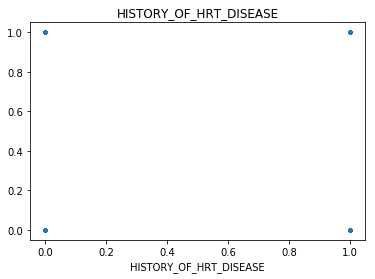

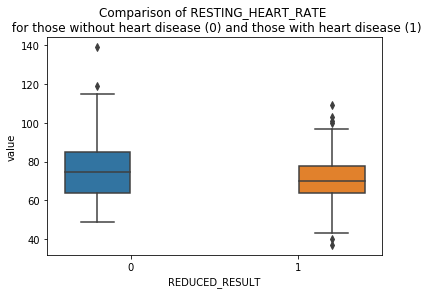

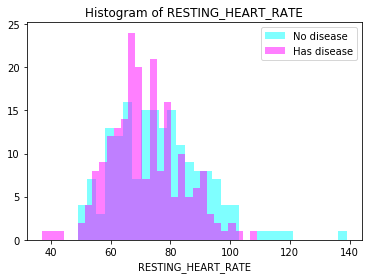

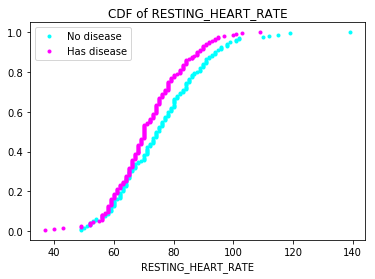

Observed difference in means: 4.25
Observed difference in std: 1.40
Observed margin of error: 2.74
Observed confidence interval is: [1.52, 6.99]
p value: 0.002



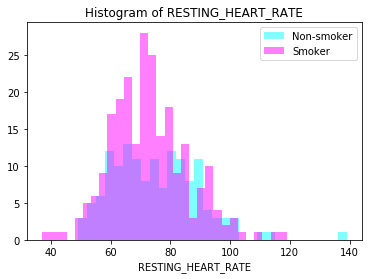

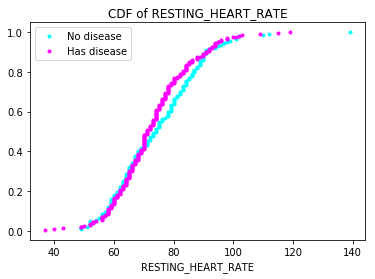

Observed difference in means: 1.83
Observed difference in std: 1.47
Observed margin of error: 2.88
Observed confidence interval is: [-1.05, 4.71]
p value: 0.101



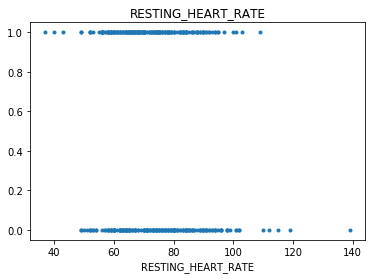

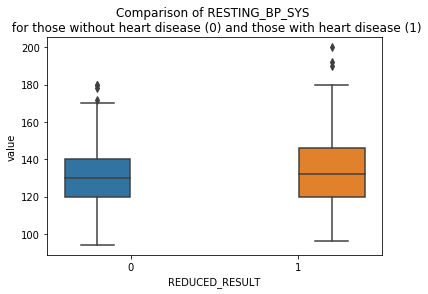

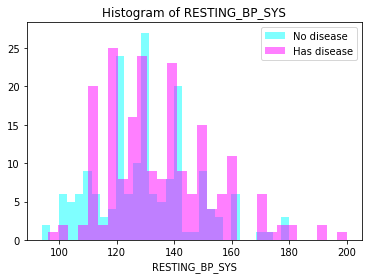

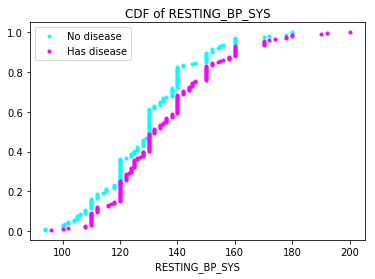

Observed difference in means: -5.85
Observed difference in std: 1.82
Observed margin of error: 3.57
Observed confidence interval is: [-9.41, -2.28]
p value: 0.999



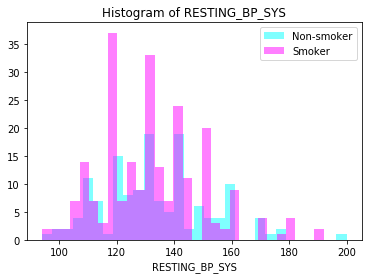

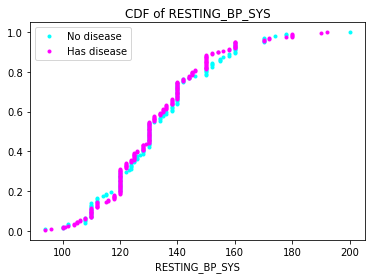

Observed difference in means: 0.95
Observed difference in std: 1.93
Observed margin of error: 3.79
Observed confidence interval is: [-2.84, 4.74]
p value: 0.314



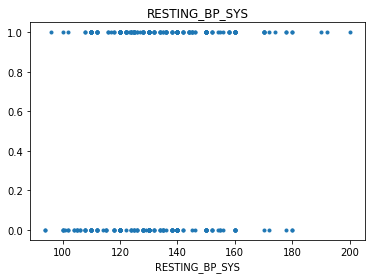

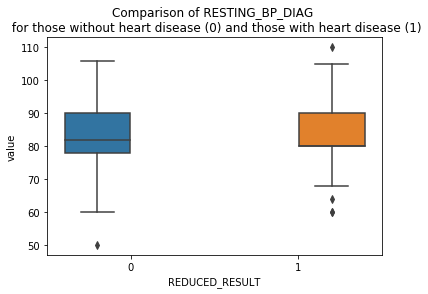

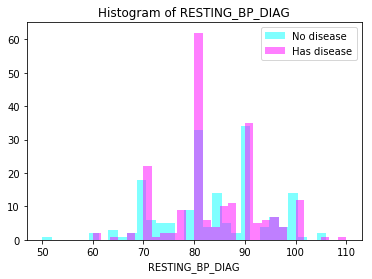

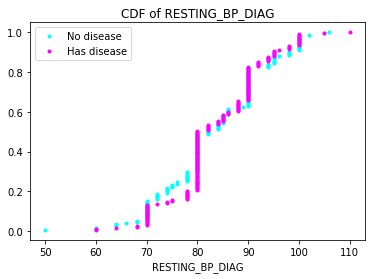

Observed difference in means: -0.49
Observed difference in std: 1.00
Observed margin of error: 1.95
Observed confidence interval is: [-2.44, 1.47]
p value: 0.688



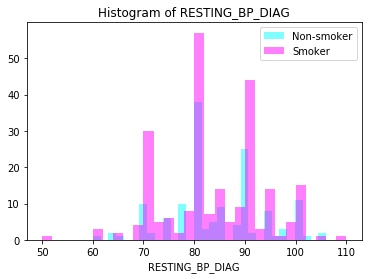

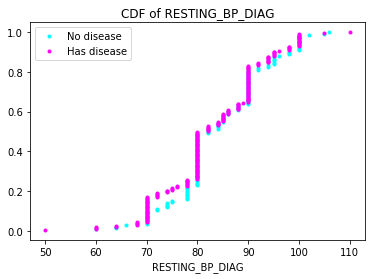

Observed difference in means: 1.16
Observed difference in std: 1.00
Observed margin of error: 1.96
Observed confidence interval is: [-0.80, 3.11]
p value: 0.128



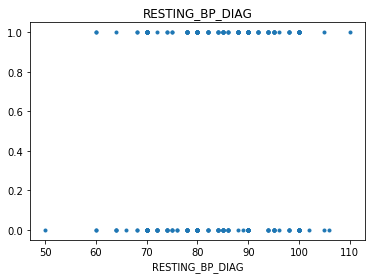

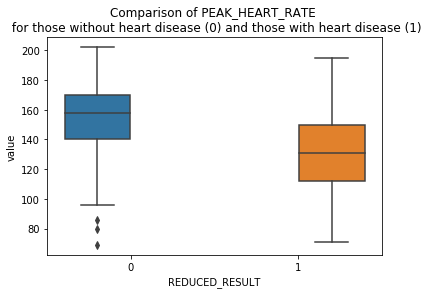

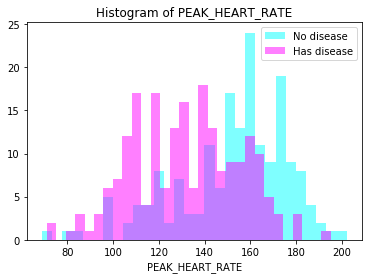

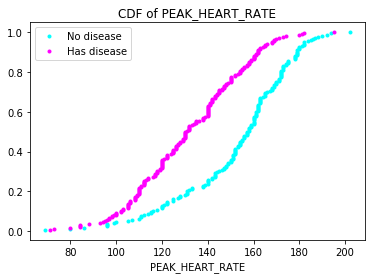

Observed difference in means: 20.75
Observed difference in std: 2.45
Observed margin of error: 4.81
Observed confidence interval is: [15.95, 25.56]
p value: 0.000



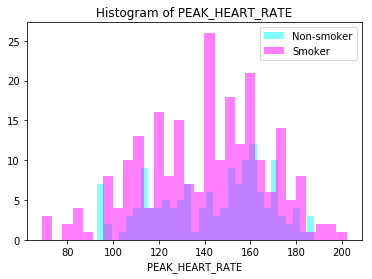

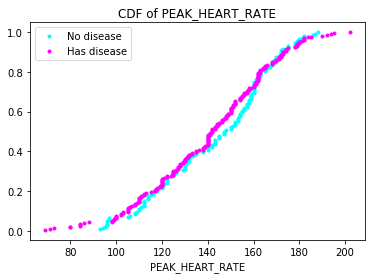

Observed difference in means: 2.80
Observed difference in std: 2.68
Observed margin of error: 5.25
Observed confidence interval is: [-2.45, 8.06]
p value: 0.158



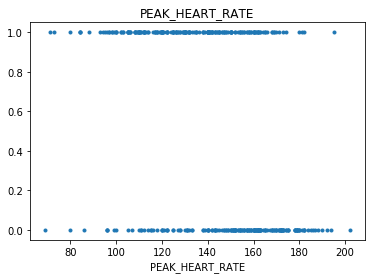

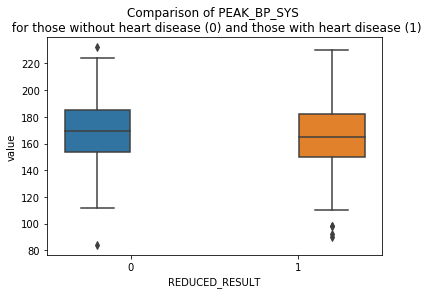

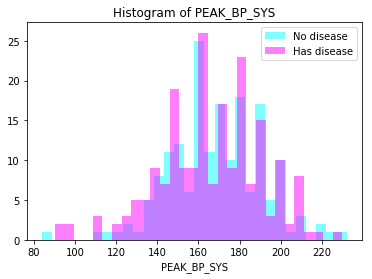

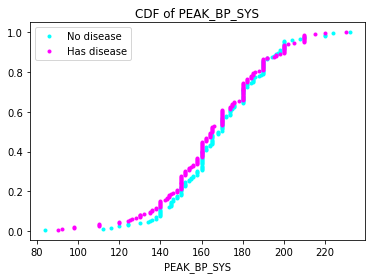

Observed difference in means: 2.93
Observed difference in std: 2.43
Observed margin of error: 4.77
Observed confidence interval is: [-1.85, 7.70]
p value: 0.120



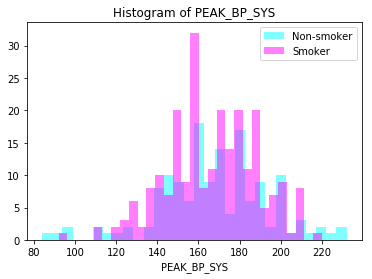

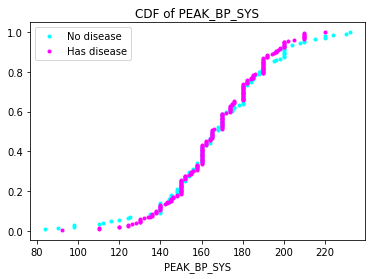

Observed difference in means: 0.22
Observed difference in std: 2.64
Observed margin of error: 5.18
Observed confidence interval is: [-4.96, 5.40]
p value: 0.462



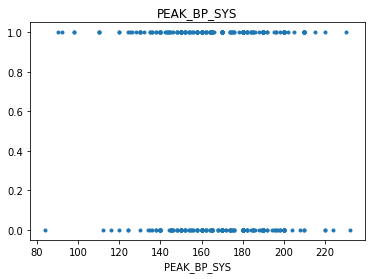

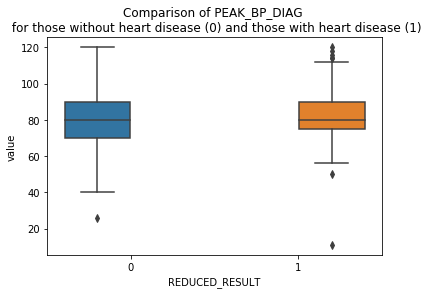

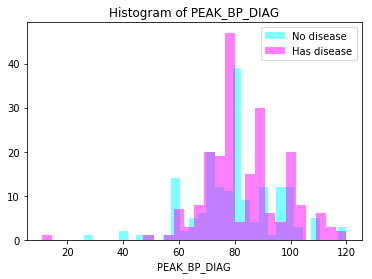

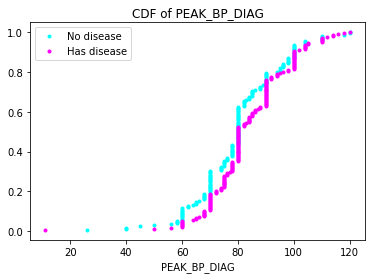

Observed difference in means: -3.61
Observed difference in std: 1.51
Observed margin of error: 2.96
Observed confidence interval is: [-6.57, -0.65]
p value: 0.993



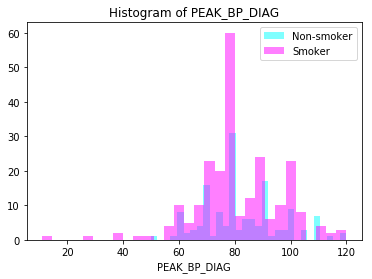

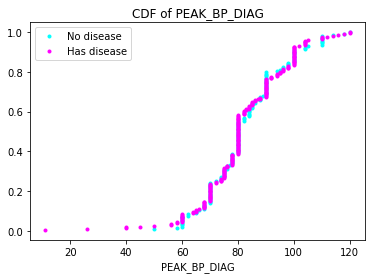

Observed difference in means: 0.89
Observed difference in std: 1.52
Observed margin of error: 2.98
Observed confidence interval is: [-2.09, 3.86]
p value: 0.284



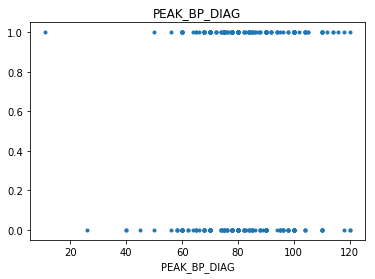

In [60]:
"""Let's do some EDA..."""

import seaborn as sns

fields_list = ['NUM_CIGS_PER_DAY',
            'SMOKING_YEARS',
            'HISTORY_OF_HRT_DISEASE',
            'RESTING_HEART_RATE',
            'RESTING_BP_SYS',
            'RESTING_BP_DIAG',
            'PEAK_HEART_RATE',
            'PEAK_BP_SYS',
            'PEAK_BP_DIAG'
              ]

#create boolean filters
HAS_HEART_DISEASE = df['REDUCED_RESULT'] == 1
IS_SMOKER = df['NUM_CIGS_PER_DAY'] > 0

for d in fields_list:
    
    #make box plots
    dd=pd.melt(df,id_vars=['REDUCED_RESULT'],value_vars=d,var_name='fruits')
    ax = sns.boxplot(x='REDUCED_RESULT',y='value',data=dd,hue='REDUCED_RESULT')
    ax.legend_.remove()    
    plt.title('Comparison of {0} \n for those without heart disease (0) and those with heart disease (1)'.format(d))
    plt.show()

    #create various dataframes for plotting
    df_clean = df[~HAS_HEART_DISEASE][d]
    df_dirty = df[HAS_HEART_DISEASE][d]
    df_not_smoker = df[~IS_SMOKER][d]
    df_smoker = df[IS_SMOKER][d]

    #plot histograms of disease-positive and disease-negative data
    plt.hist(df_clean, bins=30,alpha=0.5,color='cyan',label='No disease')
    plt.hist(df_dirty, bins=30,alpha=0.5,color='magenta',label='Has disease')
    plt.title('Histogram of {0}'.format(d))
    plt.xlabel(d) 
    plt.legend()
    plt.show()
    
    #plot cdfs of disease-positive and disease-negative data
    x_clean,y_clean = ecdf(df_clean)
    x_dirty,y_dirty = ecdf(df_dirty)
    plt.plot(x_clean,y_clean,marker='.',linestyle='None',color='cyan',label='No disease')
    plt.plot(x_dirty,y_dirty,marker='.',linestyle='None',color='magenta',label='Has disease')
    plt.title('CDF of {0}'.format(d))
    plt.xlabel(d) 
    plt.legend()
    plt.show()
    
    #are the valeus really different?
    calculate_and_print_permutation_stats(df_clean,df_dirty)
    
    #plot histograms of smoker and non-smoker data
    plt.hist(df_not_smoker, bins=30,alpha=0.5,color='cyan',label='Non-smoker')
    plt.hist(df_smoker, bins=30,alpha=0.5,color='magenta',label='Smoker')
    plt.title('Histogram of {0}'.format(d))
    plt.xlabel(d) 
    plt.legend()
    plt.show()

    #plot cdfs of smoker and non-smoker data
    x_non_smoker,y_non_smoker = ecdf(df_not_smoker)
    x_smoker,y_smoker = ecdf(df_smoker)
    plt.plot(x_non_smoker,y_non_smoker,marker='.',linestyle='None',color='cyan',label='No disease')
    plt.plot(x_smoker,y_smoker,marker='.',linestyle='None',color='magenta',label='Has disease')
    plt.title('CDF of {0}'.format(d))
    plt.xlabel(d) 
    plt.legend()
    plt.show()

    #are the valeus really different?
    calculate_and_print_permutation_stats(df_not_smoker,df_smoker)
    
    plt.plot(df[d],df['REDUCED_RESULT'],marker='.',linestyle='None')
    plt.title(d)
    plt.xlabel(d) 
    plt.show()

In [61]:
"""
Set up infrastructure for accuracy analysis
"""
metrics_list = list()

def collect_metrics(model,accuracy=0,recall=0,precision=0,stratify=True,f1=0):
    
    m = {
         'classifier':model.best_estimator_,
         'accuracy':accuracy,
         'recall':recall,
         'precision':precision,
         'f1_score':f1,
         'stratified':stratify
        }
    
    metrics_list.append(m)
    
    del m    
        

In [62]:
from sklearn.model_selection import GridSearchCV

def get_tuned_classifier(classifier):
    
    g = None
    
    params_lr = {'C':[0.01, 0.1, 1, 10]}
    params_rf = {'n_estimators':[5,10],'max_depth':[2,5]}
    
    if type(classifier) is LogisticRegression:
        
        g = GridSearchCV(classifier,params_lr,cv=5)
        
    elif type(classifier) is RandomForestClassifier: 
        
        g = GridSearchCV(classifier,params_rf,cv=5)
    
    g.random_state = 42
    
    return g

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    
"""Train and test each data set for the specified classifier"""
def run_model(classifier,X,y,stratified=False):
    
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    
    if stratified:
        
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)
        
    else:
        
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
        
    
    tuned_classifier = get_tuned_classifier(classifier)

    tuned_classifier.fit(X_train,y_train)

    predicted_values = tuned_classifier.predict(X_test)

    #calculate and store the performace metrics
    accuracy = accuracy_score(y_test,predicted_values)    
    recall = recall_score(y_test,predicted_values)    
    precision = precision_score(y_test,predicted_values)
    f1_scr = f1_score(y_test,predicted_values)
    
    collect_metrics(tuned_classifier,accuracy,recall,precision,stratified,f1_scr)
    
    del tuned_classifier
    del predicted_values

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif_scores(X):

    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["feature"] = X.columns
    
    s = 'Variance Inflation Factors for the current classifier with shape:{0}.\n\n{1}'
    
    print(s.format(X.shape,vif))
    print('\n')

In [65]:
def calculate_performance_metrics_and_coefs(filtered_metrics_list, is_stratified):
    
    best_fit_model = filtered_metrics_list[0]['classifier']
    accuracy_mean = np.mean([li['accuracy'] for li in filtered_metrics_list])
    recall_mean = np.mean([li['recall'] for li in filtered_metrics_list])
    precision_mean = np.mean([li['precision'] for li in filtered_metrics_list])    
    f1_score_mean = np.mean([li['f1_score'] for li in filtered_metrics_list])    
    
    s = 'Mean values for {0} {1}:\n\n accuracy:{2:.2f}  \t recall:{3:.2f}  \t precision:{4:.2f} \t F1 score:{5:.2f}\n'

    print(s.format(is_stratified, best_fit_model, accuracy_mean, recall_mean, precision_mean, f1_score_mean))
    
    print('Coefficients for {0} are:\n'.format(type(best_fit_model)))
    
    coefs = []
    
    if type(best_fit_model) is RandomForestClassifier:
    
        coefs = best_fit_model.feature_importances_        
        
    else:
        
        coefs = best_fit_model.coef_[0]
            
    u = ['{0:.3f}'.format(c) if (type(c) is np.float64) else print(type(c),c) for c in coefs]
    
    print(u)
    print('\n')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('\n')

In [66]:
"""Analyze the collected metrics to assist in selecting a classifier"""

def process_summary_metrics():

    for clf_type in [LogisticRegression, RandomForestClassifier]:

        filtered_list = list(filter(lambda element : type(element['classifier']) is clf_type and element['stratified'], metrics_list))

        if len(filtered_list) > 0:
            calculate_performance_metrics_and_coefs(filtered_list,'stratified')

        del filtered_list

        filtered_list = list(filter(lambda element : type(element['classifier']) is clf_type and not element['stratified'], metrics_list))

        if len(filtered_list) > 0:
            calculate_performance_metrics_and_coefs(filtered_list,'non-stratified')

        del filtered_list

        del clf_type

In [67]:
"""Used to select which features showed multicollinearity"""

def create_scatter_matrix(X):

    matrix = pd.scatter_matrix(X, alpha = 0.3, figsize = (21,16), diagonal = 'kde');
    plt.show()

In [68]:
"""
Run through the various feature selections,
calculating for each classifier the performance
metrics and variance inflations factors.

Repeat process 10x for each classifier / data combination
"""

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

columns_to_drop = ['RESULT','REDUCED_RESULT']

additional_columns_to_drop = [
                                'IS_SMOKER',
                                'RESTING_BP_DIAG',
                                'RESTING_BP_SYS',
                                'PEAK_BP_SYS',
                                'RESTING_HEART_RATE',
                                'PEAK_HEART_RATE',
                                'PEAK_BP_DIAG'
                                ]

for col_to_drop in additional_columns_to_drop:
    
    if len(metrics_list) > 0:
        metrics_list = []
    
    columns_to_drop.append(col_to_drop)

    y = df['REDUCED_RESULT']
    X = df.drop(columns_to_drop, axis=1) 
    
    calculate_vif_scores(X)
    
    classifiers = [
                    LogisticRegression(),
                    RandomForestClassifier()
                  ]

    for clf in classifiers:

        for _ in range(0,10):

            run_model(clf,X,y,stratified=True)

            run_model(clf,X,y,stratified=False)
            
    del X
    del y
    
    process_summary_metrics()
    
                

Variance Inflation Factors for the current classifier with shape:(381, 9).

          VIF                 feature
0    4.275403        NUM_CIGS_PER_DAY
1    4.632674           SMOKING_YEARS
2    2.463650  HISTORY_OF_HRT_DISEASE
3   33.882437      RESTING_HEART_RATE
4   99.328243          RESTING_BP_SYS
5  126.246305         RESTING_BP_DIAG
6   45.193992         PEAK_HEART_RATE
7   73.596654             PEAK_BP_SYS
8   42.255892            PEAK_BP_DIAG


Mean values for stratified LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):

 accuracy:0.67  	 recall:0.73  	 precision:0.68 	 F1 score:0.70

Coefficients for <class 'sklearn.linear_model.logistic.LogisticRegression'> are:

['0.000', '0.021', '0.204', '-0.002', '0.020', '0.001', '-0.030', '-0.011', '0.012']


~~~~~~~~~~~~~~~

Mean values for stratified LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):

 accuracy:0.69  	 recall:0.81  	 precision:0.68 	 F1 score:0.74

Coefficients for <class 'sklearn.linear_model.logistic.LogisticRegression'> are:

['-0.001', '0.020', '0.242', '0.001', '-0.033', '0.015']


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Mean values for non-stratified LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):

 accuracy:0.76  	 recall:0.81  	 precision:0.74 	 F1 score:0.77

Coefficients for <class 'sklearn.linear_model.

Mean values for stratified LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):

 accuracy:0.51  	 recall:0.50  	 precision:0.55 	 F1 score:0.53

Coefficients for <class 'sklearn.linear_model.logistic.LogisticRegression'> are:

['-0.010', '0.027', '-0.033']


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Mean values for non-stratified LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):

 accuracy:0.56  	 recall:0.81  	 precision:0.54 	 F1 score:0.65

Coefficients for <class 'sklearn.linear_model.logistic.LogisticRegress